In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import timedelta
from scipy.interpolate import make_interp_spline

D:\Anaconda-DATA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = r'D:\PAPERBANJIR\GRads\20170710_20170720.nc'
era5 = r'D:\PAPERBANJIR\ERA5\RAIN.nc'
cld = r'D:\PAPERBANJIR\GRads\NCHMW\14_16_HMW8.nc'

nc = xr.open_dataset(path)
era = xr.open_dataset(era5)
awn = xr.open_dataset(cld)

D:\Anaconda-DATA\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
D:\Anaconda-DATA\Lib\site-packages\xarray\coding\times.py:191: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
D:\Anaconda-DATA\Lib\site-packages\xarray\coding\times.py:191: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_ye

In [4]:
#belitung timur 

#(-2.883636, 108.239293)
#-2.90408, 107.9235

In [3]:
la = -2.88 #east belitung
lo = 108.23
LO = 107.92
LA = -2.90

tk = nc['precip']
tk = tk.sel(lat=la,lon=lo, method='nearest')
tk = tk.sel(time=slice('2017-07-14T12', '2017-07-16T12'))

In [4]:
#resample = tk.resample(time='3h').sum()
roll = tk.rolling(time=6, center=True).sum()
#coarsen = tk.coarsen(time=1).sum()
p95 = np.percentile(tk, 95)

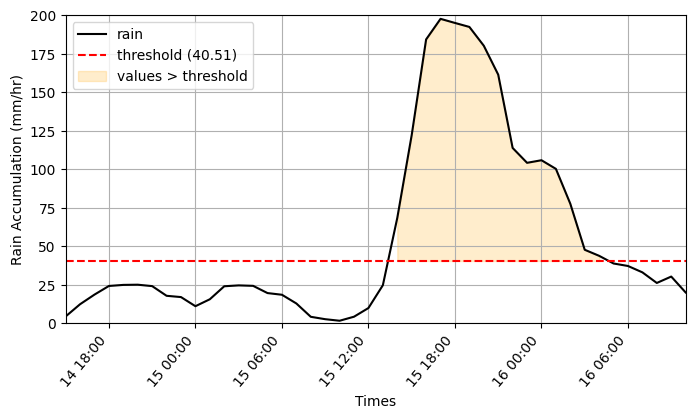

In [5]:
time = pd.to_datetime(roll.time)
roll_time = time.strftime('%d %H:%M')

#plot data
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(roll_time, roll, linestyle='-', color='k', label='rain')
ax.axhline(y=p95, color='r', linestyle='--', label=f'threshold ({p95:.2f})')
ax.fill_between(roll_time, roll, p95, where=(roll > p95), color='orange', alpha=0.2, label='values > threshold')

#time configuration
step = 6 
ax.set_xticks(range(0, len(roll_time), step))
ax.set_xticklabels(roll_time[::step], rotation=50, ha='right')

plt.ylabel('Rain Accumulation (mm/hr)')
plt.xlabel('Times')

plt.ylim(0, 200)
plt.xlim('14 15:00', '16 10:00')
ax.grid(True)
ax.legend(loc='upper left')

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/'
#plt.savefig(os.path.join(output, 'point_of_event.png'), bbox_inches='tight', dpi=300)

In [6]:
#variable

rain = nc['precip']
rain = rain.sel(lat=slice(-2.45, -3.35),lon=slice(107.3,108.4))
rain = rain.sel(time=slice('2017-07-14T12', '2017-07-16T12'))
awan = awn['t1']
awan = awan.sel(lat=slice(-3.35, -2.45),lon=slice(107.3,108.4))/100
awan = awan.sel(time=slice('2017-07-14T12', '2017-07-16T12'))

X = nc.lon.sel(lon=slice(107.3,108.4))
Y = nc.lat.sel(lat=slice(-2.5, -3.3))

In [7]:
tp = rain.mean(dim='lon').mean(dim='lat')
smooth_tp = tp.rolling(time=3).mean()
tbb = awan.mean(dim='lon').mean(dim='lat')
smooth_tbb = tbb.rolling(time=3).mean()

In [8]:
time_plot2 = pd.to_datetime(tbb.time)
time_init = time_plot2.strftime('%d %H:%M')

(0.0, 48.0)

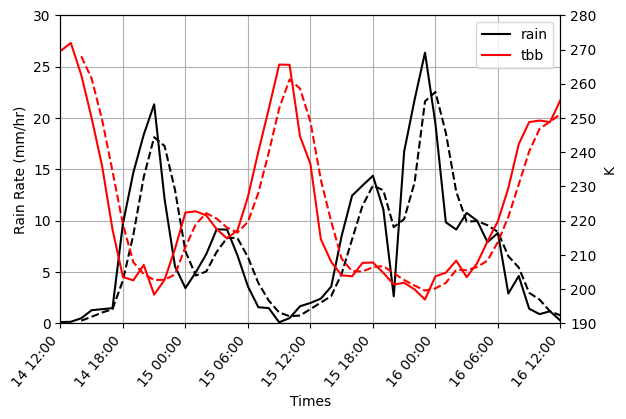

In [9]:
fig, ax = plt.subplots(figsize = (8, 4))
fig.subplots_adjust(right=0.75)
twin1 = ax.twinx()

p1, = ax.plot(time_init, tp, color='k', label="rain")
p2, = twin1.plot(time_init, tbb, color='red', label='tbb')
p3, = ax.plot(time_init, smooth_tp, color='k', linestyle='--')
p4, = twin1.plot(time_init, smooth_tbb, color='red', linestyle='--')


#time configuration
step = 6 
ax.set_xticks(range(0, len(time_init), step))
ax.set_xticklabels(time_init[::step], rotation=50, ha='right')

ax.set_xlabel("Times")
ax.set_ylabel("Rain Rate (mm/hr)")
twin1.set_ylabel("K")

ax.set_ylim(0, 30)
twin1.set_ylim(190, 280)

ax.legend(handles=[p1, p2], loc='upper right')
ax.grid(True)
ax.set_xlim('14 12:00', '16 12:00')

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/'
#plt.savefig(os.path.join(output, 'smoothing_data.png'), bbox_inches='tight', dpi=300)